**Ejercicio 1**

Un analista afirma que el rendimiento promedio mensual de una acción es superior al 1%. Para probarlo toma una muestra de 12 meses la cual tiene una media de 1.4% y la desviación estándar muestral es de 0.6%. Considerando un nivel de significancia del 5%, realice una prueba de hipótesis y verifique está afirmación.

**Solución analítica**

Planteamiento de la hipótesis

$$H_0 - \mu \leq 0.01$$
$$H_a - \mu > 0.01$$

El estadistico t:
$$t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}=\frac{0.014-0.01}{\frac{0.006}{\sqrt{12}}}≈2.3094$$

El valor critico de t para 11 grados de libertad y nivel de confianza al 95% es 1.7959.

Se rechaza la hipótesis nula, por lo que la afirmación del analista es correcta para el nivel de significancia.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Datos
media_muestral = 1.4
media_hipotesis = 1.0
s = 0.6
n = 12
alpha = 0.05

# Estadístico t
t_stat = (media_muestral - media_hipotesis) / (s / np.sqrt(n))

# Grados de libertad
df = n - 1

# Valor crítico t para cola derecha
t_crit = stats.t.ppf(1 - alpha, df)

# p-valor
p_valor = 1 - stats.t.cdf(t_stat, df)

# Resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor crítico t: {t_crit:.4f}')
print(f'p-valor: {p_valor:.4f}')

if t_stat > t_crit:
    print("Se rechaza H0: hay evidencia de que el rendimiento es mayor al 1%.")
else:
    print("No se rechaza H0: no hay suficiente evidencia de que el rendimiento sea mayor al 1%.")

Estadístico t: 2.3094
Valor crítico t: 1.7959
p-valor: 0.0207
Se rechaza H0: hay evidencia de que el rendimiento es mayor al 1%.


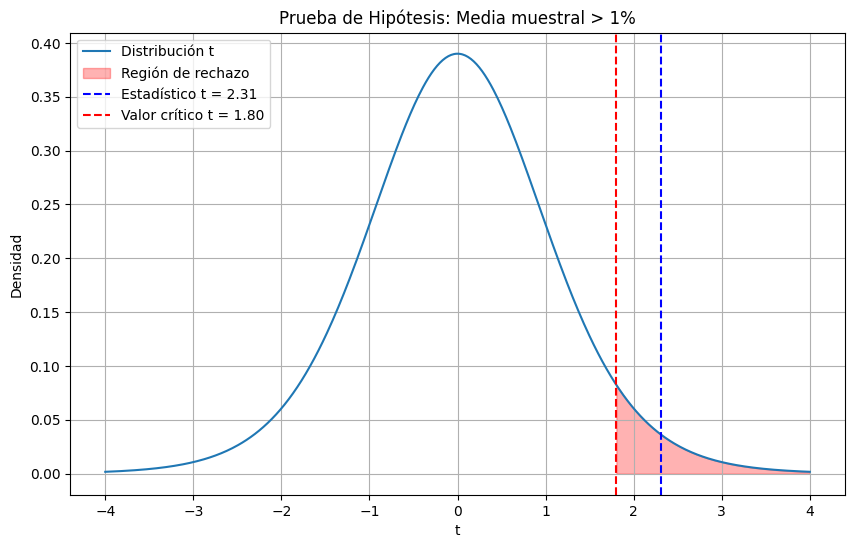

In [3]:
# Gráfica
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Distribución t')
plt.fill_between(x, 0, y, where=(x > t_crit), color='red', alpha=0.3, label='Región de rechazo')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Estadístico t = {t_stat:.2f}')
plt.axvline(t_crit, color='red', linestyle='--', label=f'Valor crítico t = {t_crit:.2f}')
plt.title('Prueba de Hipótesis: Media muestral > 1%')
plt.xlabel('t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 2**

Un analista quiere verificar si un fondo tiene un rendimiento diferente del promedio de mercado (6%). Se realiza un muestreo de 30 datos los cuales tienen una media muestral de 5.2% y desviación estándar muestral de 1.8% con un nivel de significancia del 5%. Realice una prueba de hipótesis y verifique si se cumple lo que el analista plantea.

**Solución analítica**

Planteamiento de la hipótesis

$$H_0 - \mu = 0.06$$
$$H_a - \mu \neq 0.06$$

El estadistico t:
$$t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}=\frac{0.052-0.06}{\frac{0.018}{\sqrt{30}}}≈-2.4343$$

El valor critico de t para 29 grados de libertad y nivel de confianza al 95% para una prueba de dos colas es 2.0452.

Se rechaza la hipótesis nula, por lo que la afirmación del analista es correcta para el nivel de significancia.

In [4]:
# Datos
media_muestral = 5.2
media_hipotesis = 6.0
s = 1.8
n = 30
alpha = 0.05

# Estadístico t
t_stat = (media_muestral - media_hipotesis) / (s / np.sqrt(n))
df = n - 1

# Valores críticos t para prueba bilateral
t_crit_der = stats.t.ppf(1 - alpha/2, df)
t_crit_izq = stats.t.ppf(alpha/2, df)

# p-valor
p_valor = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valores críticos t: {t_crit_izq:.4f}, {t_crit_der:.4f}')
print(f'p-valor: {p_valor:.4f}')

if t_stat < t_crit_izq or t_stat > t_crit_der:
    print("Se rechaza H0: el rendimiento es diferente al promedio de mercado.")
else:
    print("No se rechaza H0: no hay evidencia de que el rendimiento sea diferente al promedio de mercado.")

Estadístico t: -2.4343
Valores críticos t: -2.0452, 2.0452
p-valor: 0.0213
Se rechaza H0: el rendimiento es diferente al promedio de mercado.


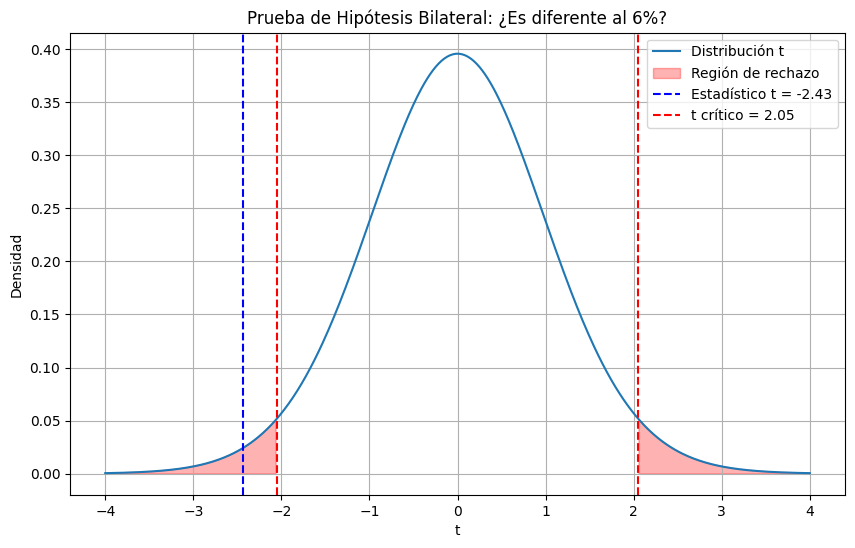

In [5]:
# Gráfica
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Distribución t')
plt.fill_between(x, 0, y, where=(x < t_crit_izq) | (x > t_crit_der), color='red', alpha=0.3, label='Región de rechazo')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Estadístico t = {t_stat:.2f}')
plt.axvline(t_crit_der, color='red', linestyle='--', label=f't crítico = {t_crit_der:.2f}')
plt.axvline(t_crit_izq, color='red', linestyle='--')
plt.title('Prueba de Hipótesis Bilateral: ¿Es diferente al 6%?')
plt.xlabel('t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 3**

Un trader quiere saber si el precio promedio de una acción ha cambiado respecto a su valor original ($\$150$). Realice una prueba de hipótesis considerando una muestra de 36 datos con una media muestral del $\$147$ y un nivel de significancia del 1%. Considere que la desviación estándar poblacional es conocida y vale $5.

**Solución analítica**

Planteamiento de la hipótesis

$$H_0 - \mu = 150$$
$$H_a - \mu \neq 150$$

Ya que la desviación estándar poblacional es conocida usamos una prueba Z.

El estadistico z:
$$z=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}=\frac{147-150}{\frac{5}{\sqrt{36}}}≈-3.6$$

El valor critico de z para un nivel de confianza al 99% para una prueba de dos colas es $\pm$2.57.

Se rechaza la hipótesis nula.

In [6]:
# Datos
media_muestral = 147
media_hipotesis = 150
sigma = 5
n = 36
alpha = 0.01

# Estadístico Z
z_stat = (media_muestral - media_hipotesis) / (sigma / np.sqrt(n))

# Valores críticos Z para prueba bilateral
z_crit_der = stats.norm.ppf(1 - alpha/2)
z_crit_izq = stats.norm.ppf(alpha/2)

# p-valor
p_valor = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f'Estadístico Z: {z_stat:.4f}')
print(f'Valores críticos Z: {z_crit_izq:.4f}, {z_crit_der:.4f}')
print(f'p-valor: {p_valor:.4f}')

if z_stat < z_crit_izq or z_stat > z_crit_der:
    print("Se rechaza H0: el precio promedio ha cambiado.")
else:
    print("No se rechaza H0: no hay evidencia de cambio en el precio promedio.")

Estadístico Z: -3.6000
Valores críticos Z: -2.5758, 2.5758
p-valor: 0.0003
Se rechaza H0: el precio promedio ha cambiado.


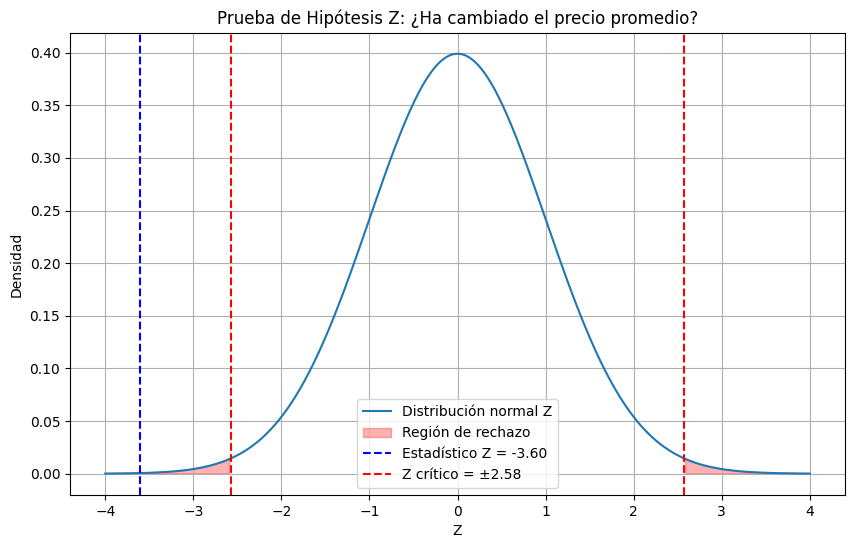

In [7]:
# Gráfica
x = np.linspace(-4, 4, 500)
y = stats.norm.pdf(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Distribución normal Z')
plt.fill_between(x, 0, y, where=(x < z_crit_izq) | (x > z_crit_der), color='red', alpha=0.3, label='Región de rechazo')
plt.axvline(z_stat, color='blue', linestyle='--', label=f'Estadístico Z = {z_stat:.2f}')
plt.axvline(z_crit_der, color='red', linestyle='--', label=f'Z crítico = ±{z_crit_der:.2f}')
plt.axvline(z_crit_izq, color='red', linestyle='--')
plt.title('Prueba de Hipótesis Z: ¿Ha cambiado el precio promedio?')
plt.xlabel('Z')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

**Ejercicio 4**

Un gestor afirma que su portafolio de inversión supera el rendimiento del índice S&P 500. (Promedio anual 8%).
Realice una prueba de hipótesis con una muestra de 25 datos con media igual a 8.9% y desviación estándar muestral de 1.5% y un nivel de significancia de 1%.

**Solución analítica**

Planteamiento de la hipótesis

$$H_0 - \mu = 0.08$$
$$H_a - \mu > 0.08$$

El estadistico t:
$$t=\frac{\bar{X}-\mu}{\frac{s}{\sqrt{n}}}=\frac{0.089-0.08}{\frac{0.015}{\sqrt{25}}}=3$$

El valor critico de t para 24 grados de libertad y nivel de confianza al 99% es 2.4922.

Se rechaza la hipótesis nula.

In [8]:
# Datos
media_muestral = 8.9
media_hipotesis = 8.0
s = 1.5
n = 25
alpha = 0.01

# Estadístico t
t_stat = (media_muestral - media_hipotesis) / (s / np.sqrt(n))
df = n - 1

# Valor crítico t para cola derecha
t_crit = stats.t.ppf(1 - alpha, df)

# p-valor
p_valor = 1 - stats.t.cdf(t_stat, df)

# Resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor crítico t: {t_crit:.4f}')
print(f'p-valor: {p_valor:.4f}')

if t_stat > t_crit:
    print("Se rechaza H0: el portafolio supera al S&P 500.")
else:
    print("No se rechaza H0: no hay suficiente evidencia de que el portafolio supere al S&P 500.")

Estadístico t: 3.0000
Valor crítico t: 2.4922
p-valor: 0.0031
Se rechaza H0: el portafolio supera al S&P 500.


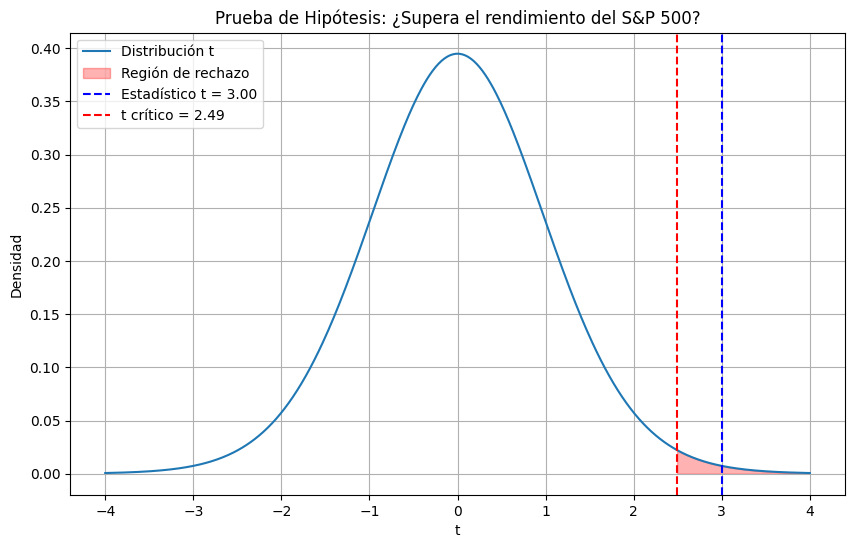

In [9]:
# Gráfica
x = np.linspace(-4, 4, 500)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Distribución t')
plt.fill_between(x, 0, y, where=(x > t_crit), color='red', alpha=0.3, label='Región de rechazo')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Estadístico t = {t_stat:.2f}')
plt.axvline(t_crit, color='red', linestyle='--', label=f't crítico = {t_crit:.2f}')
plt.title('Prueba de Hipótesis: ¿Supera el rendimiento del S&P 500?')
plt.xlabel('t')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()